# MASH results on V8 data
Without $X^TX$ in prior.

Here I explore results from a later run on V8 data using the refactored `mashr`, and compare results with analysis in mash paper on V6 data. The data was analyzed by procedures [documented here](20171002_MASH_V8.html), **with `parameter:` cov = "noxx" ie. $X^TX$  is not included in prior matrices**.

In [ ]:
# To reproduce:
!sos run analysis/20171002_MASH_V8.ipynb sfa
!sos run analysis/20171002_MASH_V8.ipynb mash --cov noxx

In [1]:
library(lattice)
library(ggplot2)
library(colorRamps)
library(mashr)
library(repr)

Loading required package: ashr


In [2]:
res = readRDS('~/Documents/GTExV8/MASH/GTExV8.ciseQTL.4MASH.noxx.K5.P3.V1.mash_model.rds')
res$result = readRDS('~/Documents/GTExV8/MASH/GTExV8.ciseQTL.4MASH.noxx.K5.P3.V1.mash_posterior.rds')

## MASH model fit
The log-likelihood of fit is:

In [3]:
get_loglik(res)

[1] -9972490

Here is a plot of weights learned.

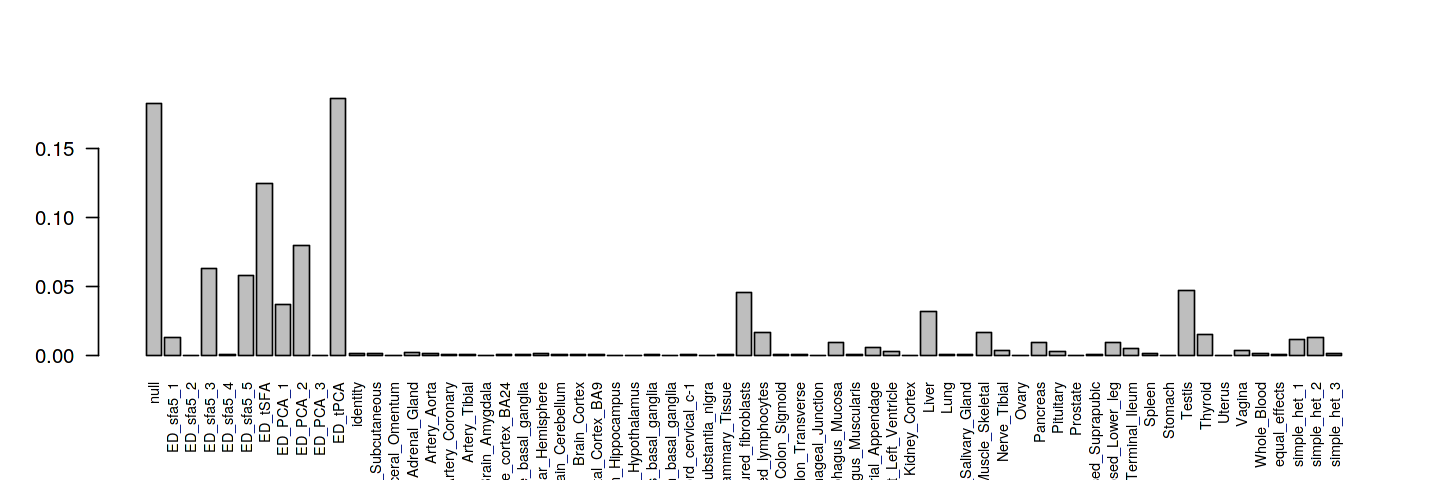

In [5]:
options(repr.plot.width=12, repr.plot.height=4)
barplot(get_estimated_pi(res), las = 2, cex.names = 0.7)

The rank 3 PCA component has the largest weight in the GTEx data. Here is a visualization for it (via correlation heatmap):

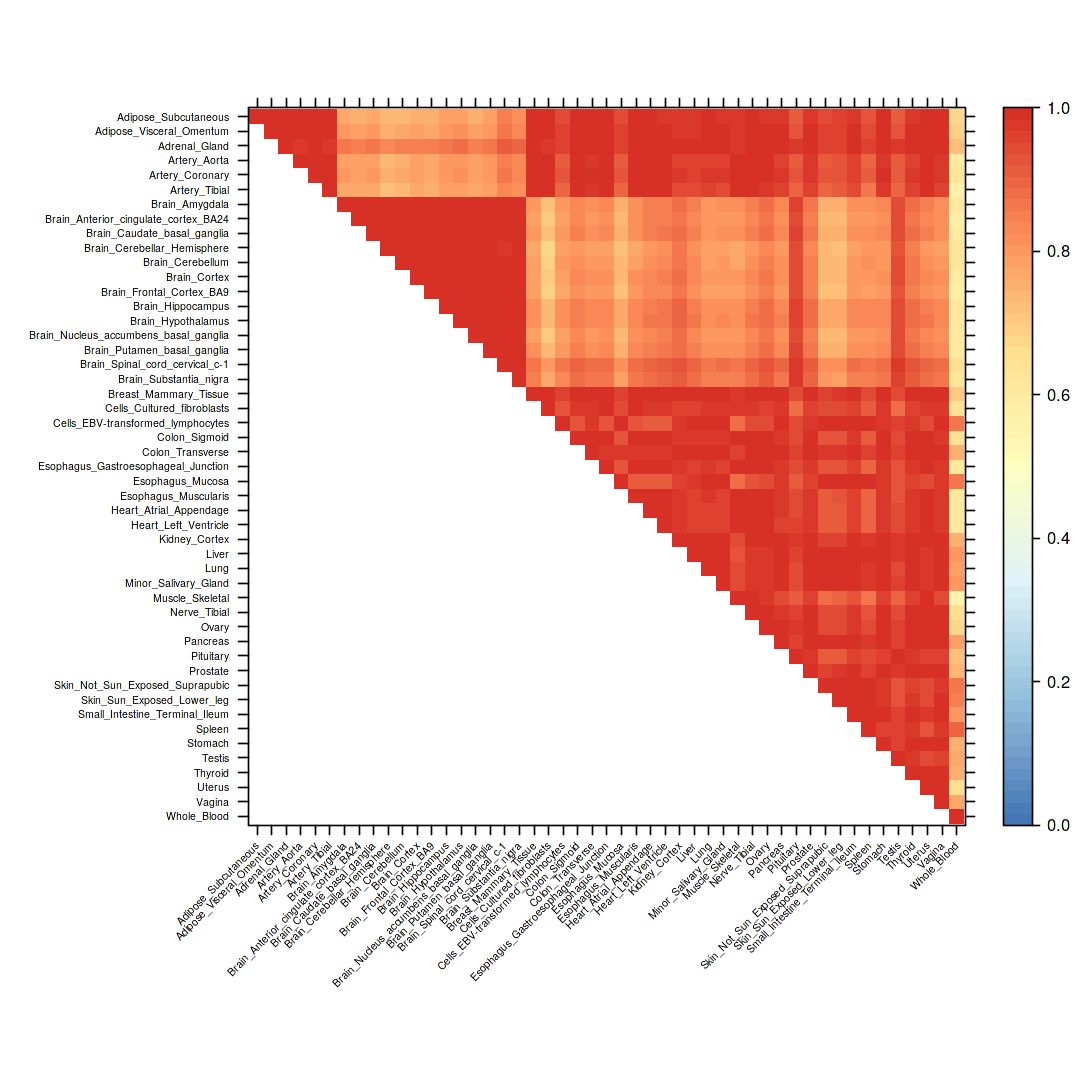

In [6]:
x           <- cov2cor(res$fitted_g$Ulist[["ED_tPCA"]])
x[x < 0]    <- 0
colnames(x) <- colnames(get_lfsr(res))
rownames(x) <- colnames(x)
x <- x[rev(rownames(x)),rev(colnames(x))]
x[lower.tri(x)] <- NA
clrs <- colorRampPalette(rev(c("#D73027","#FC8D59","#FEE090","#FFFFBF",
                               "#E0F3F8","#91BFDB","#4575B4")))(64)
n <- nrow(x)
options(repr.plot.width=9, repr.plot.height=9)
print(levelplot(x[n:1,],col.regions = clrs,xlab = "",ylab = "",
                colorkey = TRUE, at = seq(0,1,length.out = 64),
                scales = list(cex = 0.5,x = list(rot = 45))))

We can see that brain tissues are correlated, so are non-brain tissues. But correlations between brain / non-brain tissues are smaller. Also, muscle skeletal tissues and whole blood are less correlated to other tissues.

Next we perform SVD on the rank 3 PCA based covariance matrix (after Extreme deconvolution), and plot the top eigen vectors.

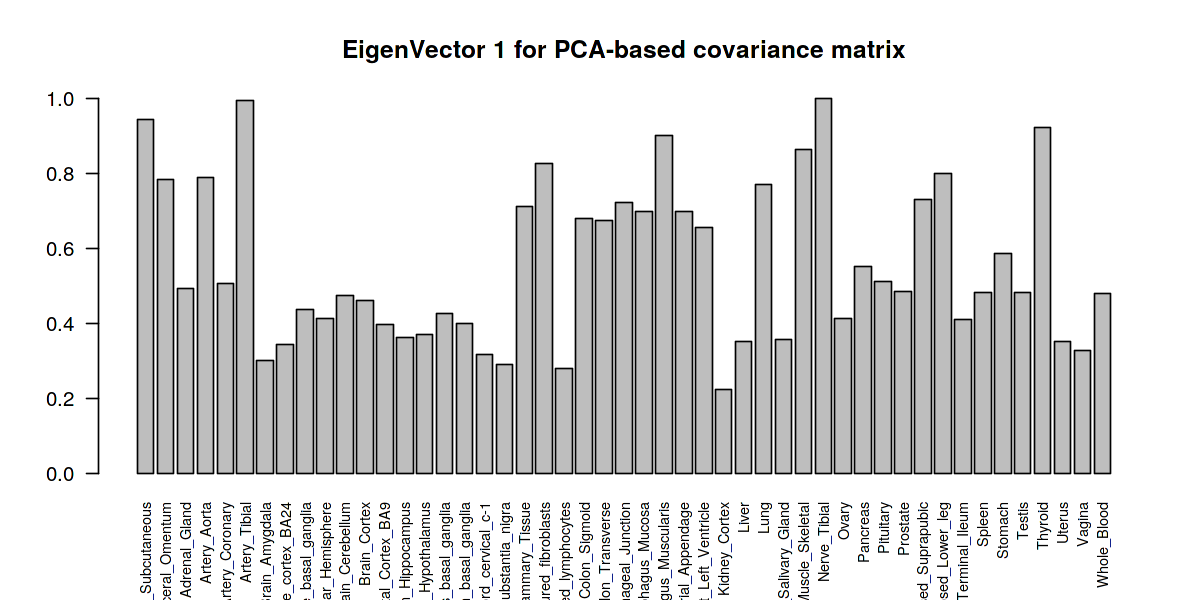

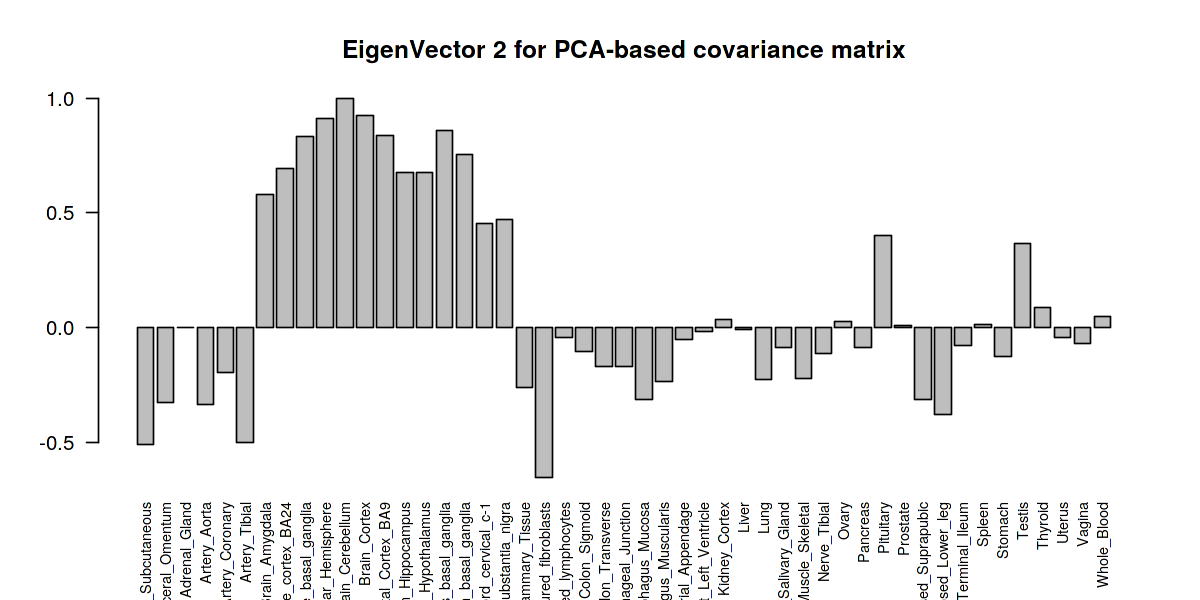

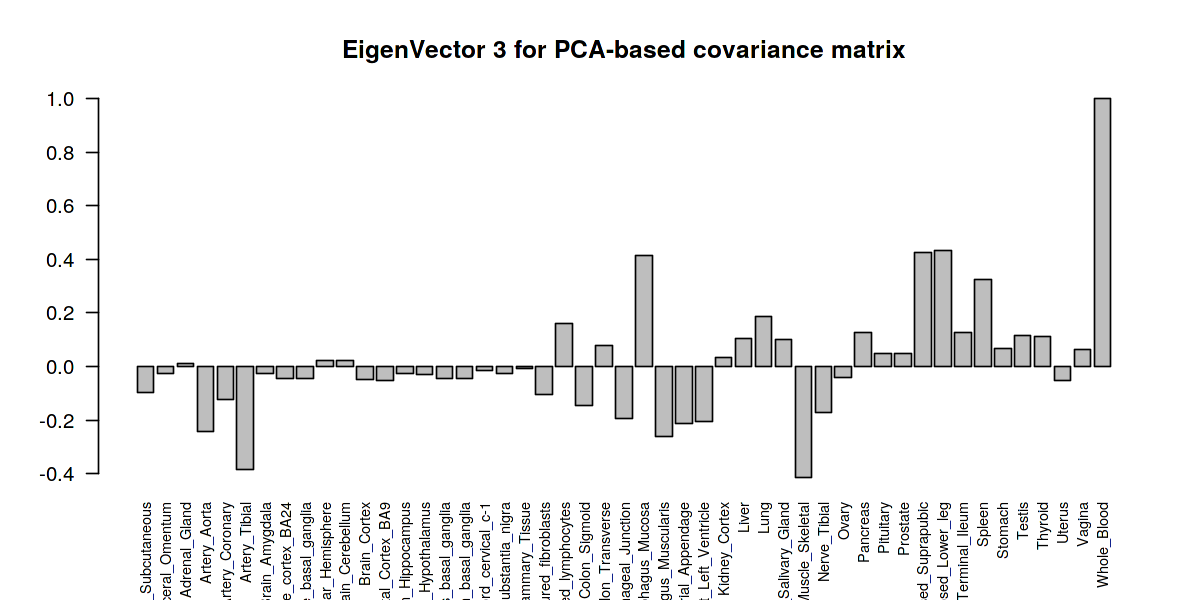

In [7]:
svd.out = svd(res$fitted_g$Ulist[["ED_tPCA"]])
v = svd.out$v
colnames(v) = colnames(get_lfsr(res))
rownames(v) = colnames(v)
options(repr.plot.width=10, repr.plot.height=5)
for (j in 1:3)
  barplot(v[,j]/v[,j][which.max(abs(v[,j]))], cex.names = 0.7,
          las = 2, main = paste0("EigenVector ", j, " for PCA-based covariance matrix"))

## Posterior quantities

In [ ]:
lfsr = get_lfsr(res)
pm = get_pm(res)

## eQTLs discovered
Use lfsr cutoff `0.01`.

In [ ]:
sig_results = list()
for (i in colnames(lfsr)) {
    sig_results[[i]] = names(get_significant_results(res, conditions = i, thresh = 0.01))
}

## Data-driven patterns of sharing
Defined by "the same sign ahd within a factor of 0.5 of each other".

In [ ]:
pairwise_sharing = get_pairwise_sharing(res, factor = 0.5)
pairwise_sharing_sign = get_pairwise_sharing(res, factor = 0)